# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress #slope and intercept to determine correlation

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy #ask for closest city name to a lat and long (geo) location

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90) #tuple to create a lat range 
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=imperial&apiKey={weather_api_key}&q='

#cities2 = ['chicago','london'] tester

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iquique
Processing Record 2 of Set 1 | san luis de la loma
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | sahab
Processing Record 6 of Set 1 | la passe
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | mitu
Processing Record 9 of Set 1 | mata-utu
Processing Record 10 of Set 1 | xishan
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | canton
Processing Record 13 of Set 1 | vernon
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | at taj
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | remire-montjoly
Processing R

Processing Record 38 of Set 4 | strezhevoy
Processing Record 39 of Set 4 | imranli
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | kone
Processing Record 42 of Set 4 | puerto princesa
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | floro
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | kiama
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | dongtai
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | puerto lempira
Processing Record 1 of Set 5 | revelstoke
Processing Record 2 of Set 5 | ha tinh
Processing Record 3 of Set 5 | anadyr
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | kingston
Processing Record 6 of Set 5 | santiago de cao
Processing Record 7 of Set 5 | laojunmiao
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | lazaro cardenas
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | koksan
Processi

Processing Record 28 of Set 8 | bikenibeu village
Processing Record 29 of Set 8 | salima
Processing Record 30 of Set 8 | dudinka
Processing Record 31 of Set 8 | launceston
Processing Record 32 of Set 8 | gazojak
Processing Record 33 of Set 8 | thinadhoo
Processing Record 34 of Set 8 | cable beach
City not found. Skipping...
Processing Record 35 of Set 8 | cockburn town
Processing Record 36 of Set 8 | tazacorte
Processing Record 37 of Set 8 | nampula
Processing Record 38 of Set 8 | lagos
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | lihue
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | brooks
Processing Record 43 of Set 8 | colonia
Processing Record 44 of Set 8 | rudbar
Processing Record 45 of Set 8 | crane
Processing Record 46 of Set 8 | badr hunayn
Processing Record 47 of Set 8 | touros
Processing Record 48 of Set 8 | fale old settlement
Processing Record 49 of Set 8 | kawthoung
City not found. Skipping...
Processing Record 0 of 

Processing Record 19 of Set 12 | jinzhou
Processing Record 20 of Set 12 | palu
Processing Record 21 of Set 12 | pijijiapan
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | waitara
Processing Record 24 of Set 12 | tripoli
Processing Record 25 of Set 12 | mirny
Processing Record 26 of Set 12 | coruripe
Processing Record 27 of Set 12 | mount vernon
Processing Record 28 of Set 12 | queenstown
Processing Record 29 of Set 12 | buka
Processing Record 30 of Set 12 | kayangel
Processing Record 31 of Set 12 | christchurch
Processing Record 32 of Set 12 | ben gardane
Processing Record 33 of Set 12 | taroa
Processing Record 34 of Set 12 | lakatoro
Processing Record 35 of Set 12 | berdyaush
Processing Record 36 of Set 12 | dalandzadgad
Processing Record 37 of Set 12 | inongo
Processing Record 38 of Set 12 | outjo
Processing Record 39 of Set 12 | rauma
Processing Record 40 of Set 12 | yung shue wan
Processing Record 41 of Set 12 | jinxiang
Processing Record 42 of Set 12 | f

In [9]:
#city_data ... test

In [10]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iquique,-20.2208,-70.1431,73.13,74,93,1.52,CL,Mon Feb 19 15:13:59 2024
1,san luis de la loma,17.2706,-100.8939,83.25,54,2,8.03,MX,Mon Feb 19 15:18:01 2024
2,adamstown,-25.0660,-130.1015,78.12,84,95,14.14,PN,Mon Feb 19 15:18:01 2024
3,tiksi,71.6872,128.8694,-37.07,98,45,5.39,RU,Mon Feb 19 15:18:02 2024
4,sahab,31.8721,36.0050,47.03,87,40,5.75,JO,Mon Feb 19 15:18:02 2024
...,...,...,...,...,...,...,...,...,...
575,hajjah,15.6943,43.6058,61.23,87,73,3.69,YE,Mon Feb 19 15:23:43 2024
576,belmonte,-15.8631,-38.8828,76.82,94,100,8.97,BR,Mon Feb 19 15:23:43 2024
577,gebre guracha,9.8000,38.4000,58.26,75,96,2.86,ET,Mon Feb 19 15:23:44 2024
578,gorno-altaysk,51.9561,85.9550,-17.48,100,84,1.99,RU,Mon Feb 19 15:23:44 2024


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iquique,-20.2208,-70.1431,73.13,74,93,1.52,CL,Mon Feb 19 15:13:59 2024
1,san luis de la loma,17.2706,-100.8939,83.25,54,2,8.03,MX,Mon Feb 19 15:18:01 2024
2,adamstown,-25.0660,-130.1015,78.12,84,95,14.14,PN,Mon Feb 19 15:18:01 2024
3,tiksi,71.6872,128.8694,-37.07,98,45,5.39,RU,Mon Feb 19 15:18:02 2024
4,sahab,31.8721,36.0050,47.03,87,40,5.75,JO,Mon Feb 19 15:18:02 2024


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangassou,4.7413,22.8184,79.09,40,5,0.45,CF,Tue Feb 13 13:31:03 2024
1,iqaluit,63.7506,-68.5145,-4.27,70,75,2.30,CA,Tue Feb 13 13:31:04 2024
2,udachny,66.4167,112.4000,-33.56,66,100,5.79,RU,Tue Feb 13 13:31:04 2024
3,atafu village,-8.5421,-172.5159,81.00,86,100,24.58,TK,Tue Feb 13 13:31:05 2024
4,lib,8.3122,167.3766,80.17,68,100,18.50,MH,Tue Feb 13 13:31:06 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [15]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
def chart(x,y, title):
    plt.figure(figsize=[7,5])
    plt.scatter(x, y, edgecolor='black')
    plt.grid()
    plt.ylabel(title)
    #plt.savefig(f'output_data/Latitude_vs_{title}.png')
    plt.xlabel('Latitude')
    plt.title(f"Latitude vs {title} ({time.strftime('%Y-%m-%d')})")
    plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# city_data_df.plot.scatter('Lat','Max Temp', grid=True, linewidths=1,edgecolor='black') #pandas

In [17]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x = city_data_df.Lat
y = city_data_df['Max Temp']
title = 'Max Temperature (C)'

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

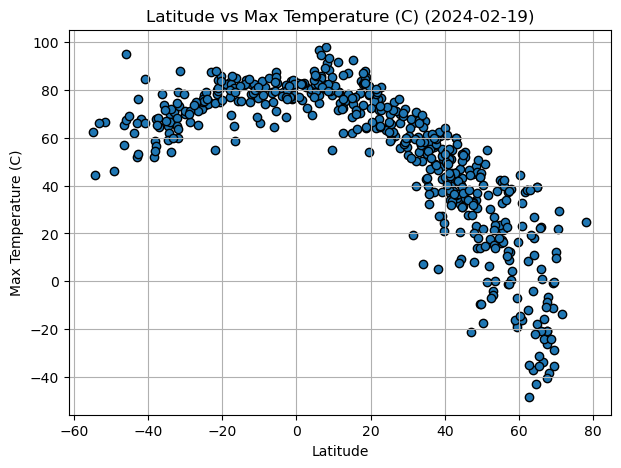

In [18]:
chart(x,y,title)

#### Latitude Vs. Humidity

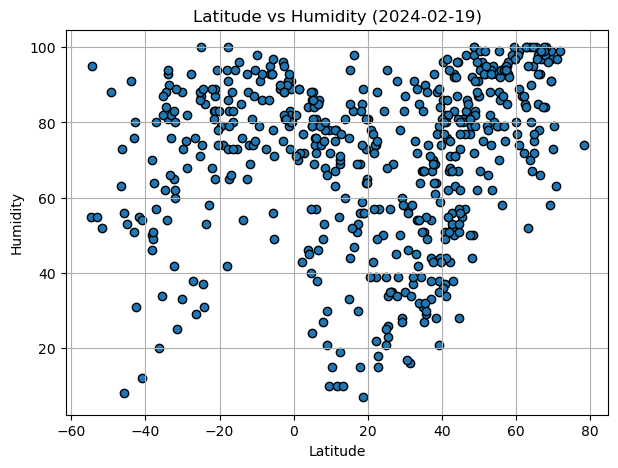

<Figure size 640x480 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# y = city_data_df['Humidity']

y = city_data_df['Humidity']
title = 'Humidity'
chart(x,y,title)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

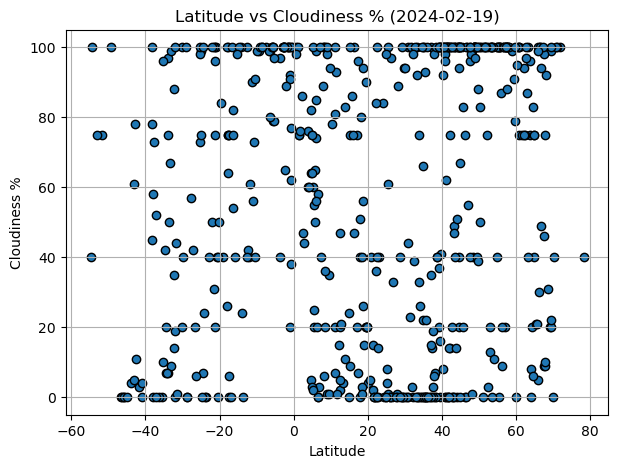

<Figure size 640x480 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
y = city_data_df['Cloudiness']
title = 'Cloudiness %'
chart(x,y,title)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

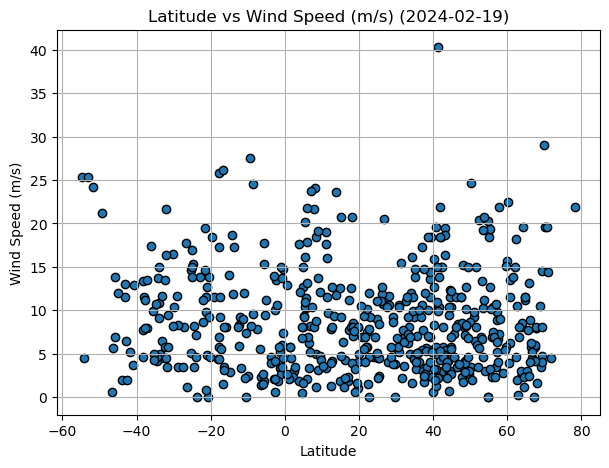

<Figure size 640x480 with 0 Axes>

In [21]:
# Build the scatter plots for latitude vs. wind speed
#Incorporate the other graph properties
y = city_data_df['Wind Speed']
title = 'Wind Speed (m/s)'
chart(x,y,title)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

def linear_reg(x, y, title):
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    print(f"r-value: {r_value}")
    plt.scatter(x, y, color='steelblue', label='Data')
    
    # regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    
    
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.1, 0.9, equation_text, fontsize=12, transform=plt.gca().transAxes, color='red')
   
    plt.xlabel('Latitude')
    plt.ylabel(title)
    
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()

In [23]:
# X = credit_score_df['Yearly Groceries : Current Debt']
# y = credit_score_df['Yearly Expenditure : Current Debt']

# # Linear regression
# slope, intercept, r_value, p_value, std_err = st.linregress(X, y)

# # Plot data points
# plt.scatter(X, y, label='Data')

# # Plot regression line
# plt.plot(X, slope * X + intercept, color='black', label='Linear Regression')

# plt.xlabel('Yearly Groceries : Current Debt')
# plt.ylabel('Yearly Expenditure : Current Debt')
# plt.title('Positive Correlation 1')
# plt.legend()
# plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangassou,4.7413,22.8184,79.09,40,5,0.45,CF,Tue Feb 13 13:31:03 2024
1,iqaluit,63.7506,-68.5145,-4.27,70,75,2.30,CA,Tue Feb 13 13:31:04 2024
2,udachny,66.4167,112.4000,-33.56,66,100,5.79,RU,Tue Feb 13 13:31:04 2024
4,lib,8.3122,167.3766,80.17,68,100,18.50,MH,Tue Feb 13 13:31:06 2024
6,zaxo,37.1482,42.7001,56.26,54,100,7.74,IQ,Tue Feb 13 13:31:07 2024


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,atafu village,-8.5421,-172.5159,81.00,86,100,24.58,TK,Tue Feb 13 13:31:05 2024
5,grytviken,-54.2811,-36.5092,44.28,95,100,4.56,GS,Tue Feb 13 13:31:06 2024
7,waitangi,-43.9535,-176.5597,61.83,91,4,1.99,NZ,Tue Feb 13 13:31:07 2024
8,margaret river,-33.9500,115.0667,54.12,81,97,10.83,AU,Tue Feb 13 13:31:08 2024
9,okahao,-17.8850,15.0667,83.46,42,26,5.75,NaN,Tue Feb 13 13:31:09 2024


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.8681407127539978


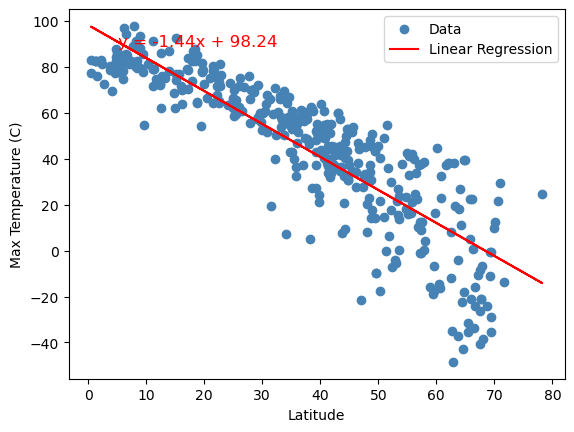

In [43]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Max Temp']
title = 'Max Temperature (C)'
linear_reg(x,y, title)


r-value: 0.607106799840451


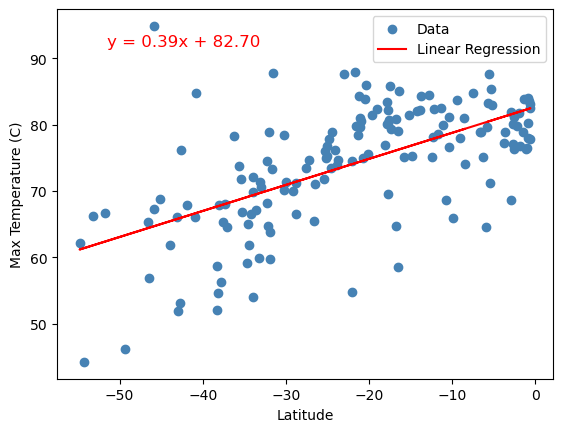

In [44]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df.Lat
y = southern_hemi_df['Max Temp']
title = 'Max Temperature (C)'
linear_reg(x,y, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.41249387752789557


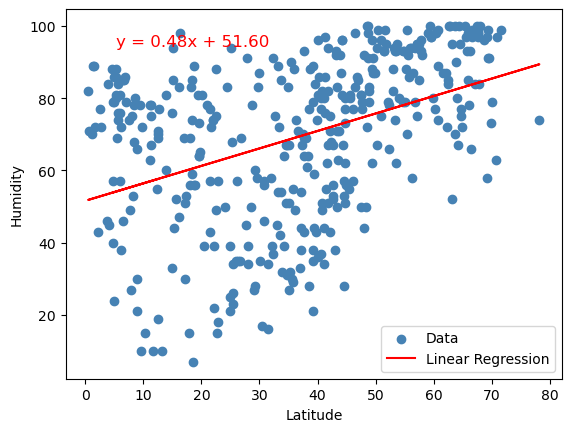

In [47]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Humidity']
title = 'Humidity'
linear_reg(x,y, title)

r-value: 0.44487137226574675


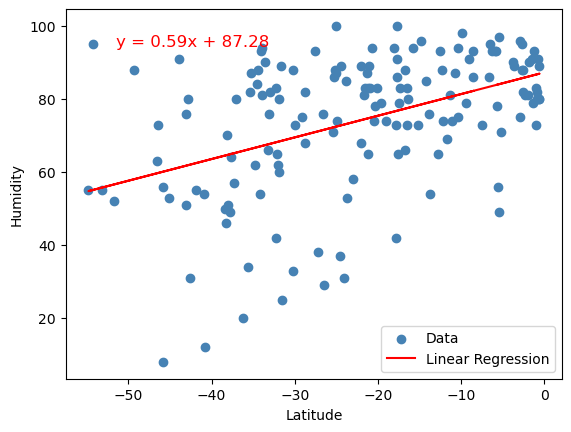

In [48]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df['Humidity']
title = 'Humidity'
linear_reg(x,y, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.20783036696510715


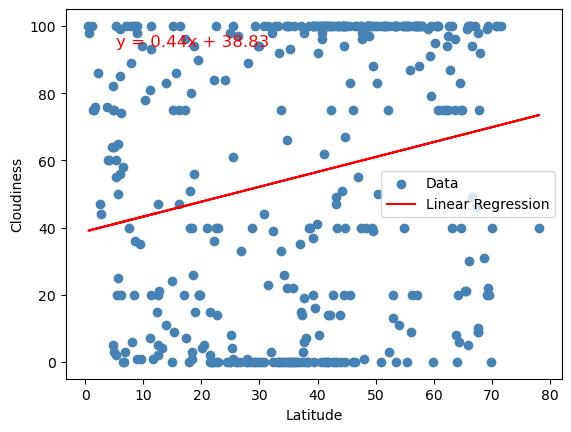

In [49]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Cloudiness']
title = 'Cloudiness'
linear_reg(x,y, title)

r-value: 0.4631638284386727


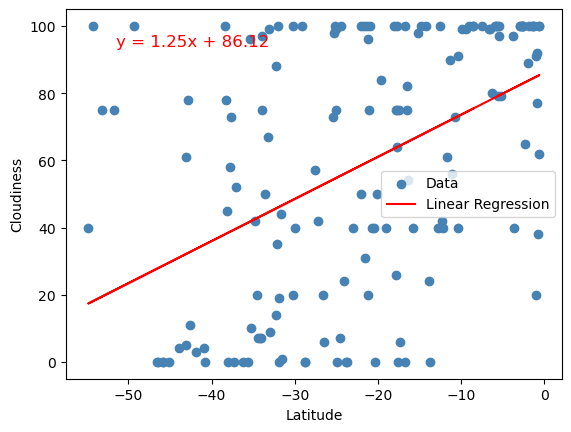

In [50]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df['Cloudiness']
title = 'Cloudiness'
linear_reg(x,y, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.0065972449247653645


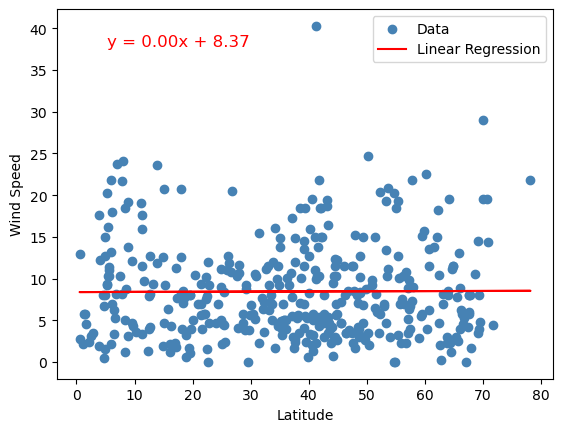

In [51]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Wind Speed']
title = 'Wind Speed'
linear_reg(x,y, title)

r-value: -0.18149371857716257


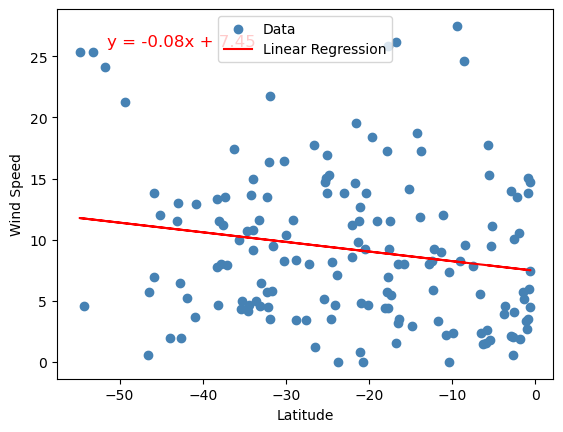

In [54]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df['Wind Speed']
title = 'Wind Speed'
linear_reg(x,y, title)


**Discussion about the linear relationship:** YOUR RESPONSE HERE